In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv("https://github.com/ricardoramos12/30daychartchallenge/raw/refs/heads/main/Day01-Part-to-whole/data.csv")
filtered_data = data[['name', 'period']]
# Eliminar todo a la derecha después del segundo espacio en 'period'
filtered_data.loc[:, 'period'] = filtered_data['period'].apply(lambda x: ' '.join(x.split()[:2]))
filtered_data = filtered_data[filtered_data['period'] != 'USA']

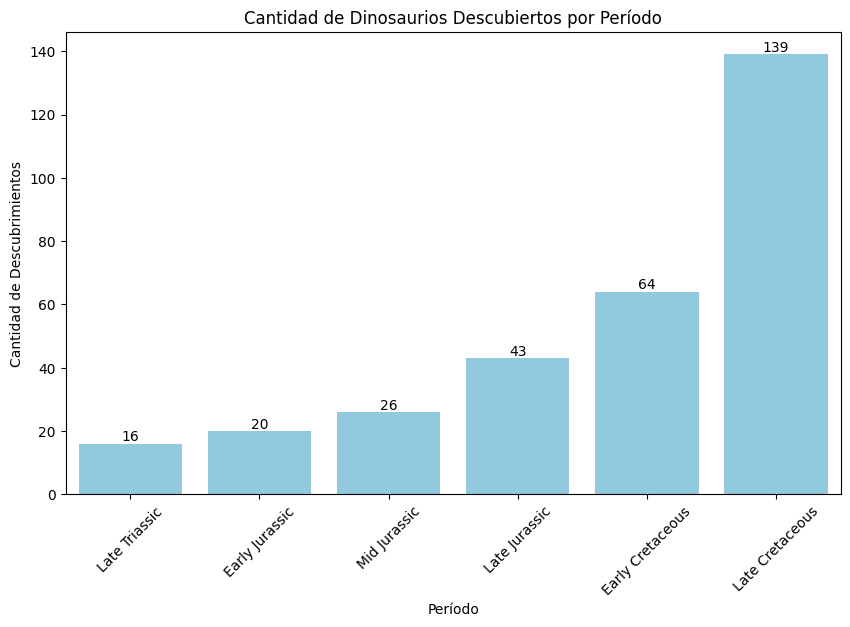

In [13]:
# Agrupa los datos por 'period' y cuenta las ocurrencias de 'name'
dino_counts = filtered_data.groupby('period')['name'].count().reset_index()
dino_counts = dino_counts.rename(columns={'name': 'count'})

# Define el orden cronológico correcto de los períodos
period_order = ["Late Triassic", "Early Jurassic", "Mid Jurassic", "Late Jurassic", "Early Cretaceous", "Late Cretaceous"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dino_counts, x='period', y='count', color="skyblue", order=period_order)

# Añade la cantidad encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Etiquetas y título
plt.title("Cantidad de Dinosaurios Descubiertos por Período")
plt.xlabel("Período")
plt.ylabel("Cantidad de Descubrimientos")
plt.xticks(rotation=45)

plt.show()